In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from mlxtend.plotting import plot_decision_regions

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)


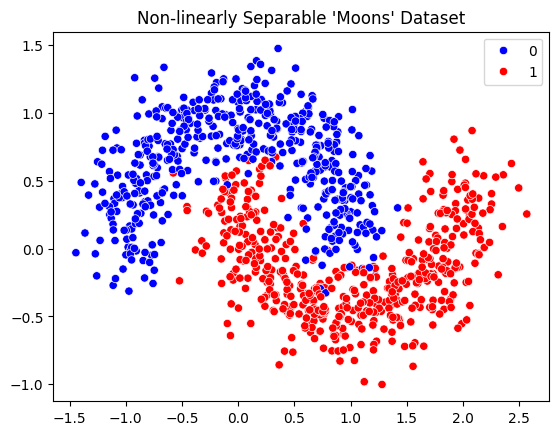

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=y,palette=['blue','red'])
plt.title("Non-linearly Separable 'Moons' Dataset")
plt.show()

Since the data is overlapping, it cannot be classified using normal linear classifer and hence low accuracy

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
model_svc=SVC(kernel='linear')
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.855

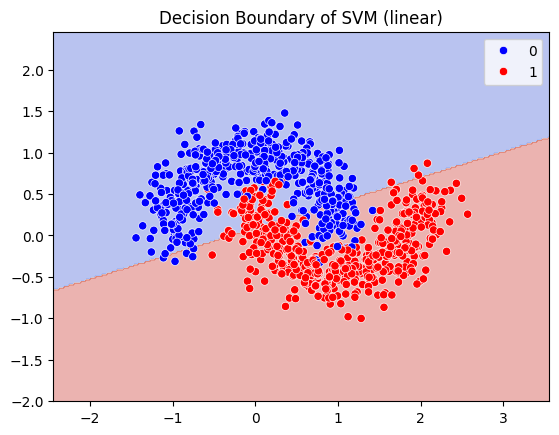

In [18]:
def decision_boundary(model,X,y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,palette=['blue','red'])

model=SVC(kernel='linear')
model.fit(X, y)
decision_boundary(model,X,y)
plt.title("Decision Boundary of SVM (linear)")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
model_svc=SVC(kernel='poly',degree=3)
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.885

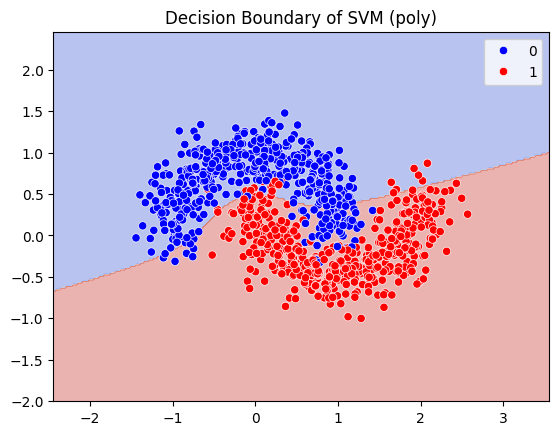

In [19]:
model=SVC(kernel='poly',degree=3)
model.fit(X, y)
decision_boundary(model,X,y)
plt.title("Decision Boundary of SVM (poly)")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
model=SVC(kernel='rbf',gamma=0.001,C=1)
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.885

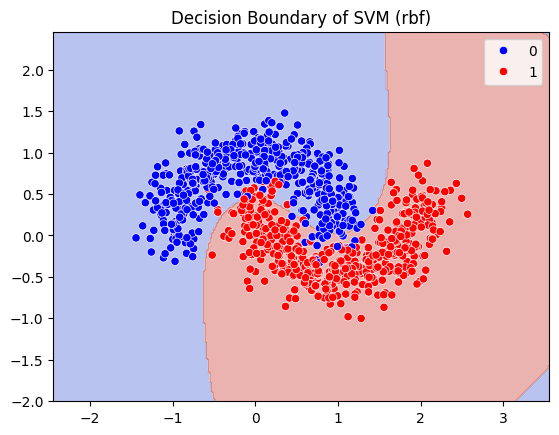

In [32]:
model=SVC(kernel='rbf',gamma=1,C=0.1)
model.fit(X, y)
decision_boundary(model,X,y)
plt.title("Decision Boundary of SVM (rbf)")
plt.show()

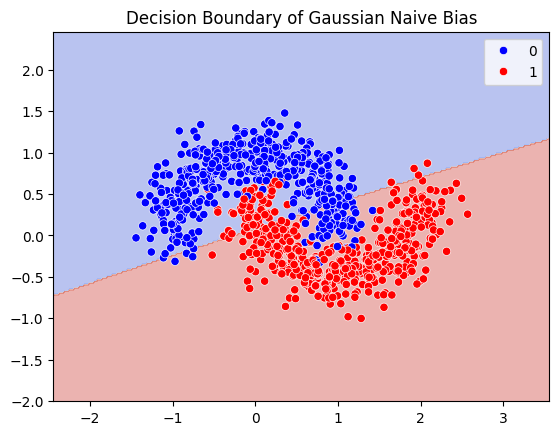

In [27]:
model=GaussianNB()
model.fit(X,y)
decision_boundary(model,X,y)
plt.title("Decision Boundary of Gaussian Naive Bias")
plt.show()

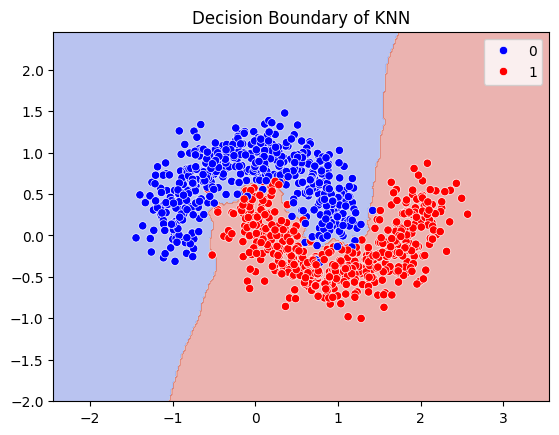

In [30]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
decision_boundary(model,X,y)
plt.title("Decision Boundary of KNN")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
model1 = SVC(kernel='rbf',probability=True,C=0.1,gamma=1)
model2 = KNeighborsClassifier(n_neighbors=4)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [13]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [14]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score1,auc_score2

(np.float64(0.9976879640745187), np.float64(0.9816815615134944))

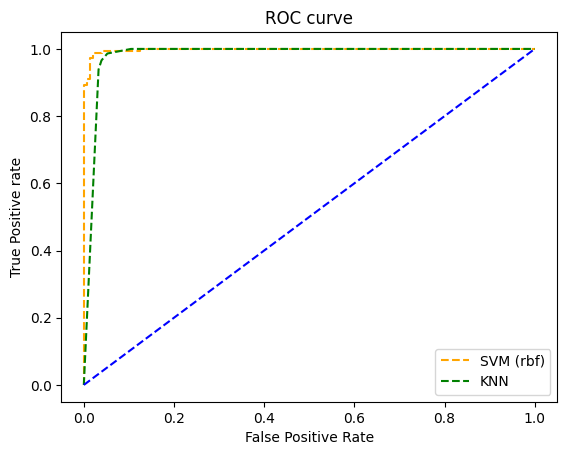

In [15]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM (rbf)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [31]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear','poly']
}
svc = SVC()

grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test data
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9789007092198581
Test Accuracy: 0.9765886287625418
